# Perform whole process of optzer on jupyter

The example on the `README.ipynb` is just a showcase of commandline workflow on jupyter notebook. This notebook will show the same thing purely on jupyter notebook (purely on python).

In [1]:
import numpy as np
from optzer import Optzer
from simple_func import line
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='talk', style='ticks')

In [2]:
import optzer
optzer.__version__

'0.2.1'

In [3]:
!make init

rm -f in.vars.optzer.[1-9]* *~
rm -rf out.cs.* subdir_*
rm -rf db.optzer.json out.optzer in.vars.optzer.best


In [4]:
# Generate reference data, g(x) = a*x +b +eps, where eps is a Gaussian noise.
xs = np.linspace(-1.0, 1.0, 100)
rng = np.random.RandomState(42)
a_ = 1.0
b_ = 0.0
refd = line(xs,a_,b_) + 0.1*rng.randn(len(xs))

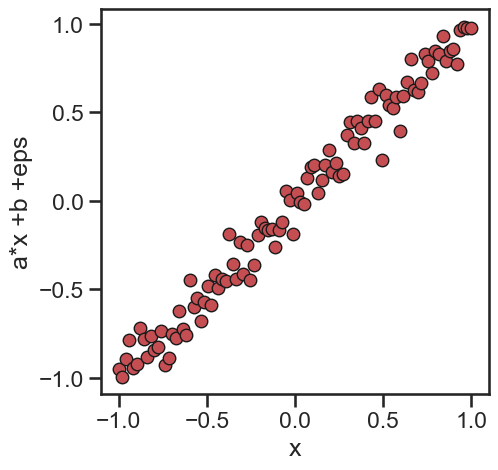

In [5]:
plt.figure(figsize=(5,5))
plt.plot(xs,refd,'ro',mec='k',label='ref')
plt.xlabel('x')
plt.ylabel('a*x +b +eps')
plt.show()

In [6]:
opt = Optzer(nproc=5, seed=42, vnames=['a','b'])

In [7]:
vs = {'a': -0.4, 'b':2.0}
slims = {'a':[-10.0, 10.0], 'b':[-10.0, 10.0]}
hlims = {'a':[-10.0, 10.0], 'b':[-10.0, 10.0]}
opt.set_variables(vs, slims, hlims)

In [8]:
def loss_func(vs, **kwargs):
    """Loss function that computes loss value from a given variables."""
    a = vs['a']
    b = vs['b']
    refd = kwargs['refdata'] 
    xs = kwargs['xs']
    yd = line(xs,a,b)
    loss = ((yd-refd)**2).sum() /len(xs)
    return loss

In [9]:
options = {
    'refdata':refd,
    'xs':xs,
    'num_iteration': 50,
    'opt_method': 'cs',
    'num_individuals': 4,
    'cs_fraction':  0.25,
    'update_vrange':  10,
    'fval_upper_limit':  100.0,
}

In [10]:
opt.optimize(loss_func, **options)
# This wiil take a while, but the cell returns control immediately.
# You can find db.optzer.json file when the above opt.optimize(...) actually finishes.

 Update variable ranges
          a:   -9.918   10.000
          b:   -8.519    9.318
 Update variable ranges
          a:   -9.918   10.000
          b:   -9.346    9.318
 Update variable ranges
          a:   -3.793    5.698
          b:   -2.600    2.577
 Update variable ranges
          a:   -0.832    2.886
          b:   -1.144    1.123
 Update variable ranges
          a:   -0.014    2.068
          b:   -0.634    0.613


In [12]:
!head db.optzer.json
!tail db.optzer.json

{"iid":1,"loss":4.7229105521,"gen":0,"a":-0.4,"b":2.0}
{"iid":2,"loss":85.6570566527,"gen":0,"a":-2.5091976231,"b":9.0142861282}
{"iid":3,"loss":8.4310359342,"gen":0,"a":4.6398788362,"b":1.9731696839}
{"iid":4,"loss":68.3525259205,"gen":0,"a":-6.8796271912,"b":-6.8801095933}
{"iid":5,"loss":4.5069960837,"gen":1,"a":-0.6665758747,"b":1.8728266932}
{"iid":6,"loss":8.0249353398,"gen":1,"a":4.558259526,"b":1.9203655481}
{"iid":7,"loss":62.4053885127,"gen":1,"a":-7.1982702429,"b":-6.2954690769}
{"iid":8,"loss":83.093125822,"gen":1,"a":-1.6911853597,"b":8.9678895016}
{"iid":9,"loss":3.8545121517,"gen":1,"a":3.6846605302,"b":-1.1969501252}
{"iid":10,"loss":3.1833229568,"gen":2,"a":3.6814373196,"b":0.8513665509}
{"iid":245,"loss":0.0460097294,"gen":49,"a":1.038409306,"b":-0.2040931411}
{"iid":246,"loss":0.0194066619,"gen":49,"a":0.9053473394,"b":0.0776537046}
{"iid":247,"loss":0.9121386919,"gen":49,"a":1.0565261977,"b":0.9399584585}
{"iid":248,"loss":0.6328028855,"gen":49,"a":-0.1940571683,"b"

In [13]:
from optzer.io import read_db_optzer
db = read_db_optzer('db.optzer.json')
db

,iid,loss,gen,a,b
0,1,4.722911,0,-0.400000,2.000000
1,2,85.657057,0,-2.509198,9.014286
2,3,8.431036,0,4.639879,1.973170
3,4,68.352526,0,-6.879627,-6.880110
4,5,4.506996,1,-0.666576,1.872827
...,...,...,...,...,...
249,250,0.136580,50,0.392361,-0.012283
250,251,1.293479,50,0.981377,1.123242
251,252,0.019394,50,0.852311,-0.066232
252,253,1.274936,50,2.886027,0.246453


In [14]:
bestidx = db.loss.argmin()
best = db.iloc[bestidx].to_dict()
best

{'iid': 167.0,
 'loss': 0.0082870431,
 'gen': 33.0,
 'a': 1.0270408534,
 'b': -0.0103990689}

In [16]:
a = best['a']
b = best['b']
ys = line(xs,a,b)

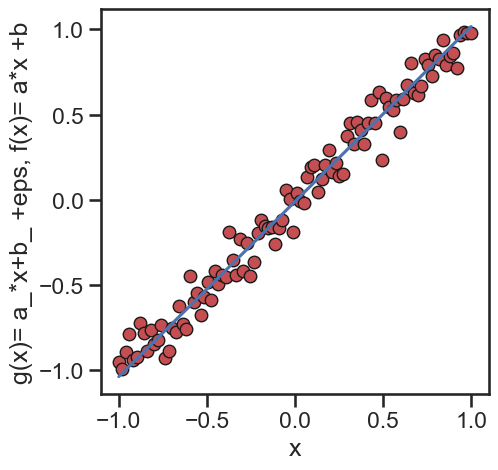

In [17]:
plt.figure(figsize=(5,5))
plt.plot(xs,refd,'ro',mec='k',label='reference data')
plt.plot(xs,ys,'b-',label='optimized line')
plt.xlabel('x')
plt.ylabel('g(x)= a_*x+b_ +eps, f(x)= a*x +b')
plt.show()